In [1]:
import csv
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read CSVs
csv2005_df = pd.read_csv("veteran_data/2005.csv", index_col=0)
csv2006_df = pd.read_csv("veteran_data/2006.csv", index_col=0)
csv2007_df = pd.read_csv("veteran_data/2007.csv", index_col=0)
csv2008_df = pd.read_csv("veteran_data/2008.csv", index_col=0)
csv2009_df = pd.read_csv("veteran_data/2009.csv", index_col=0)
csv2010_df = pd.read_csv("veteran_data/2010.csv", index_col=0)
csv2011_df = pd.read_csv("veteran_data/2011.csv", index_col=0)
csv2005_df.head()

,state,vet_pop_2005,overall_pop_18_2005,vet_pop_p_2005,vet_suicides_2005,all_suicides_2005,vet_suicides_p_2005,vet_males,vet_males_p,vet_females,...,vet_40_49,vet_35-54,vet_45_54,vet_50_59,vet_45_64,vet_55_64,vet_60,vet_65,vet_rate,civ_rate
0,Alabama,403950,3344721,0.120772,135,535,0.252336,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.419978,13.601875
1,Alaska,74482,446969,0.166638,24,131,0.183206,22.0,0.916667,2.0,...,NaN,NaN,9.0,NaN,NaN,5.0,NaN,4.0,32.222550,28.725835
2,Arizona,538880,4238996,0.127124,225,945,0.238095,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.753266,19.458849
3,Arkansas,259304,2023819,0.128126,81,400,0.202500,79.0,0.975309,2.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,25.0,31.237466,18.078622
4,California,2193336,25543447,0.085867,633,3206,0.197442,613.0,0.968404,20.0,...,NaN,NaN,NaN,NaN,220.0,NaN,NaN,317.0,28.860147,11.019220


In [3]:
# Clean CSVs by dropping columns with missing information
cleaned2005 = csv2005_df.drop(columns=['vet_males', 'vet_males_p','vet_females','vet_females_p','vet_15_24','vet_18_29','vet_17_34','vet_25_34','vet_30_39','vet_25_44','vet_35_44','vet_40_49','vet_35-54','vet_45_54','vet_50_59','vet_45_64','vet_55_64','vet_60','vet_65','vet_rate','civ_rate'])
cleaned2006 = csv2006_df.drop(columns=['vet_males','vet_males_p','vet_females','vet_females_p','vet_15_24','vet_18_29','vet_17_34','vet_25_34','vet_30_39','vet_25_44','vet_35_44','vet_40_49','vet_35-54','vet_45_54','vet_50_59','vet_45_64','vet_55_64','vet_60','vet_65','vet_rate','civ_rate'])
cleaned2007 = csv2007_df.drop(columns=['vet_males','vet_males_p','vet_females','vet_females_p','vet_15_24','vet_18_29','vet_17_34','vet_25_34','vet_30_39','vet_25_44','vet_35_44','vet_40_49','vet_35-54','vet_45_54','vet_50_59','vet_45_64','vet_55_64','vet_60','vet_65','vet_rate','civ_rate'])
cleaned2008 = csv2008_df.drop(columns=['vet_males','vet_males_p','vet_females','vet_females_p','vet_15_24','vet_18_29','vet_17_34','vet_25_34','vet_30_39','vet_25_44','vet_35_44','vet_40_49','vet_35-54','vet_45_54','vet_50_59','vet_45_64','vet_55_64','vet_60','vet_65','vet_rate','civ_rate'])
cleaned2009 = csv2009_df.drop(columns=['vet_males','vet_males_p','vet_females','vet_females_p','vet_15_24','vet_18_29','vet_17_34','vet_25_34','vet_30_39','vet_25_44','vet_35_44','vet_40_49','vet_35-54','vet_45_54','vet_50_59','vet_45_64','vet_55_64','vet_60','vet_65','vet_rate','civ_rate'])
cleaned2010 = csv2010_df.drop(columns=['vet_males','vet_males_p','vet_females','vet_females_p','vet_15_24','vet_18_29','vet_17_34','vet_25_34','vet_30_39','vet_25_44','vet_35_44','vet_40_49','vet_35-54','vet_45_54','vet_50_59','vet_45_64','vet_55_64','vet_60','vet_65','vet_rate','civ_rate'])
cleaned2011 = csv2011_df.drop(columns=['vet_males','vet_males_p','vet_females','vet_females_p','vet_15_24','vet_18_29','vet_17_34','vet_25_34','vet_30_39','vet_25_44','vet_35_44','vet_40_49','vet_35-54','vet_45_54','vet_50_59','vet_45_64','vet_55_64','vet_60','vet_65','vet_rate','civ_rate'])
to_be_merged = ['cleaned2005', 'cleaned2006', 'cleaned2007', 'cleaned2008', 'cleaned2009', 'cleaned2010', 'cleaned2011']

In [4]:
# Merge CSVs to create new CSV
merged = pd.merge(cleaned2005, cleaned2006, how='outer', on='state')
merged = pd.merge(merged, cleaned2007, how='outer', on='state')
merged = pd.merge(merged, cleaned2008, how='outer', on='state')
merged = pd.merge(merged, cleaned2009, how='outer', on='state')
merged = pd.merge(merged, cleaned2010, how='outer', on='state')
merged = pd.merge(merged, cleaned2011, how='outer', on='state')
merged.to_csv('veteran_data/veteran_suicides_2005-2011.csv')

## Veteran Suicides in the United States (2005 - 2011)

In [6]:
# Open new CSV
veterans_df = pd.read_csv("veteran_data/veteran_suicides_2005-2011.csv")
veterans_df = veterans_df.drop(columns='Unnamed: 0')
veterans_df.head()

,state,vet_pop_2005,overall_pop_18_2005,vet_pop_p_2005,vet_suicides_2005,all_suicides_2005,vet_suicides_p_2005,vet_pop_2006,overall_pop_18_2006,vet_pop_p_2006,...,vet_pop_p_2010,vet_suicides_2010,all_suicides_2010,vet_suicides_p_2010,vet_pop_2011,overall_pop_18_2011,vet_pop_p_2011,vet_suicides_2011,all_suicides_2011,vet_suicides_p_2011
0,Alabama,403950,3344721,0.120772,135,535,0.252336,408917,3473558,0.117723,...,0.110360,156,679,0.229750,395753,3662910,0.108043,163,680,0.239706
1,Alaska,74482,446969,0.166638,24,131,0.183206,70067,478581,0.146406,...,0.140705,35,164,0.213415,72407,517799,0.139836,27,142,0.190141
2,Arizona,538880,4238996,0.127124,225,945,0.238095,558906,4521911,0.123600,...,0.111217,240,1093,0.219579,533608,4842927,0.110183,242,1091,0.221815
3,Arkansas,259304,2023819,0.128126,81,400,0.202500,258170,2110583,0.122322,...,0.112340,105,447,0.234899,238790,2221409,0.107495,89,447,0.199105
4,California,2193336,25543447,0.085867,633,3206,0.197442,2142367,26789221,0.079971,...,0.069784,705,3913,0.180169,1910994,28292703,0.067544,706,3923,0.179964


In [7]:
#Calculate the Suicides per 100,000 People
vet_per_cap_suic_per_year_list = []
for year in np.arange(2005,2012,1):
       vet_per_cap_suic_per_year_list.append(((veterans_df[f"vet_suicides_{year}"].sum())/(veterans_df[f"vet_pop_{year}"].sum()))*100000)

non_vet_suic_per_year_list = []
for year in np.arange(2005,2012,1):
       non_vet_suic_per_year_list.append(((veterans_df[f"all_suicides_{year}"].sum()-veterans_df[f"vet_suicides_{year}"].sum())/(veterans_df[f"overall_pop_18_{year}"].sum()-veterans_df[f"vet_pop_{year}"].sum()))*100000)

gen_pop_suic_per_year_list = []
for year in np.arange(2005,2012,1):
       gen_pop_suic_per_year_list.append(((veterans_df[f"all_suicides_{year}"].sum())/(veterans_df[f"overall_pop_18_{year}"].sum()))*100000)

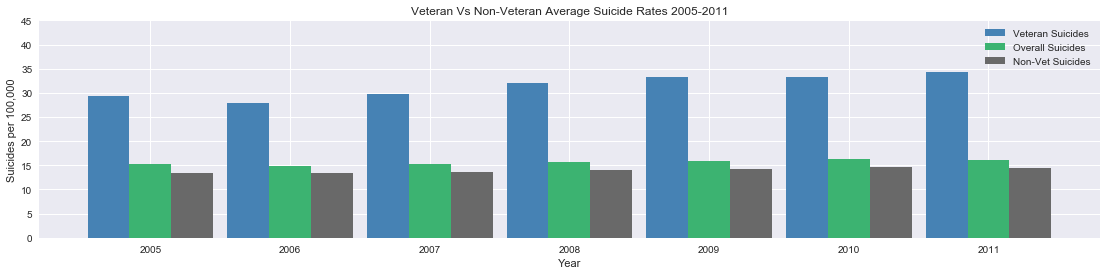

In [8]:
#Graph the Suicide Rates
sns.set()
x = np.arange(2005, 2012, 1) 
plt.figure(figsize=(19,4))

plt.bar(x-.3, vet_per_cap_suic_per_year_list, label="Veteran Suicides", width=.3, color='steelblue')
plt.bar(x, gen_pop_suic_per_year_list, label="Overall Suicides",width=.3, color='mediumseagreen')
plt.bar(x+.3, non_vet_suic_per_year_list, label="Non-Vet Suicides",width=.3, color='dimgrey')

plt.xlabel("Year")
plt.ylabel("Suicides per 100,000")
plt.title("Veteran Vs Non-Veteran Average Suicide Rates 2005-2011")
plt.legend()
plt.ylim(0, 45)
plt.show()

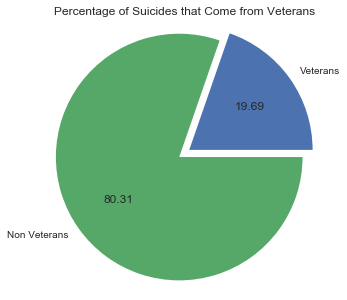

In [9]:
# What percentage of suicides come from veterans
total_vet_suicides_list = []
total_non_vet_suicides_list = []
for year in np.arange(2005,2012,1):
    total_vet_suicides_list.append(veterans_df[f"vet_suicides_{year}"].sum())
    total_non_vet_suicides_list.append(veterans_df[f"all_suicides_{year}"].sum()-veterans_df[f"vet_suicides_{year}"].sum())
total_vet_suicides = np.sum(total_vet_suicides_list)
total_non_vet_suicides = np.sum(total_non_vet_suicides_list)

plt.figure(figsize=(5,5))
plt.title("Percentage of Suicides that Come from Veterans")
plt.pie(
    [total_vet_suicides, total_non_vet_suicides],
    explode=[.1,0],
    labels=["Veterans", "Non Veterans"],
    autopct='%.2f',
    pctdistance=.6)
plt.axis('equal')
plt.show()

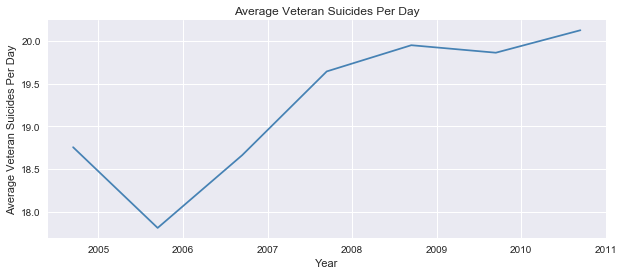

In [10]:
# Average veteran suicides per day
sns.set()
x = np.arange(2005, 2012, 1)
plt.figure(figsize=(10,4))
plt.title("Average Veteran Suicides Per Day")
plt.xlabel("Year")
plt.ylabel("Average Veteran Suicides Per Day")
plt.plot(x-.3, np.divide(total_vet_suicides_list, 365), label="Average Veteran Suicides Per Day", color='steelblue')
plt.show()

## Veteran Suicides by State (2005 - 2011)

## Veteran Suicides by Age Group

In [11]:
# Read CSVs and create dataframe
vets1_df = pd.read_csv("veteran_data/Vet Suicides 2005-2014 (Age Groups).csv") 
vets2_df = pd.read_csv("veteran_data/veteran_suicide_age_2005-2008.csv") 
vets1_df.head(7)
vets_by_age_2014 = vets1_df.set_index("age range")
vets_by_age_2014.head(7)

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
age range,,,,,,,,,,
18-29,21.2,35.5,29.7,36.8,37.7,44.5,50.6,54.4,60.7,58.4
30-39,36.9,35.8,36.0,33.7,37.2,39.4,44.0,40.5,43.0,46.2
40-49,44.4,34.2,42.1,42.6,40.1,39.2,45.0,41.2,41.1,41.0
50-59,36.5,41.1,38.7,43.5,42.1,42.0,45.5,41.1,35.0,39.7
60-69,29.9,31.7,31.4,36.7,31.5,32.3,30.5,29.2,31.0,32.2
70-79,31.4,34.2,30.3,32.6,33.5,32.0,32.8,36.3,41.1,34.1
80+,40.4,36.9,37.8,40.8,41.8,35.4,43.5,44.7,44.1,45.8


In [12]:
# Calculate the mean and standard error
avg_18_29_mean = (vets_by_age_2014.loc["18-29"]).mean()
avg_30_39_mean = (vets_by_age_2014.loc["30-39"]).mean()
avg_40_49_mean = (vets_by_age_2014.loc["40-49"]).mean()
avg_50_59_mean = (vets_by_age_2014.loc["50-59"]).mean()
avg_60_69_mean = (vets_by_age_2014.loc["60-69"]).mean()
avg_70_79_mean = (vets_by_age_2014.loc["70-79"]).mean()
avg_80_mean = (vets_by_age_2014.loc["80+"]).mean()

std_18_29_mean = st.stats.sem(vets_by_age_2014.loc["18-29"])/4
std_30_39_mean = st.stats.sem(vets_by_age_2014.loc["30-39"])/4
std_40_49_mean = st.stats.sem(vets_by_age_2014.loc["40-49"])/4
std_50_59_mean = st.stats.sem(vets_by_age_2014.loc["50-59"])/4
std_60_69_mean = st.stats.sem(vets_by_age_2014.loc["60-69"])/4
std_70_79_mean = st.stats.sem(vets_by_age_2014.loc["70-79"])/4
std_80_mean = st.stats.sem(vets_by_age_2014.loc["80+"])/4

data1 = [['18-29',avg_18_29_mean,std_18_29_mean],['30-39',avg_30_39_mean,std_30_39_mean],['40-49',avg_40_49_mean,std_40_49_mean],['50-59',avg_50_59_mean,std_50_59_mean],['60-69',avg_60_69_mean,std_60_69_mean],['70-79',avg_70_79_mean,std_70_79_mean],['80+',avg_80_mean,std_80_mean]]
final_data1 = pd.DataFrame(data1,columns=['Age Group','Mean','STD'])
final_data1

,Age Group,Mean,STD
0,18-29,42.95,1.025814
1,30-39,39.27,0.322211
2,40-49,41.09,0.238032
3,50-59,40.52,0.249522
4,60-69,31.64,0.160563
5,70-79,33.83,0.240891
6,80+,41.12,0.278757


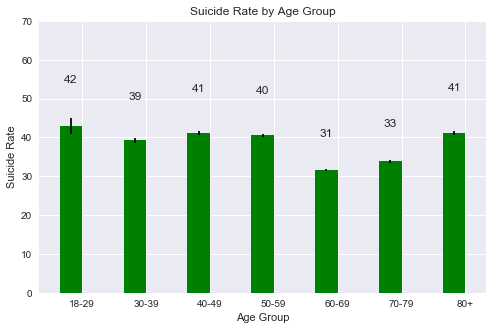

In [15]:
# Plot Bar Chart for final_data1
N = 7
fig, ax = plt.subplots()
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars


recs1 = ax.bar(ind,final_data1['Mean'], width, color='green', yerr=2*final_data1['STD'])

# Add some text for labels, title and axes ticks
ax.set_ylabel('Suicide Rate')
ax.set_xlabel('Age Group')
ax.set_title('Suicide Rate by Age Group')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'))
plt.ylim(0,70,10)
plt.legend()
sns.set(rc={'figure.figsize':(8,5)})
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.25*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(recs1)
plt.show()

In [16]:
# Create dataframe for vets2_df
vets_age_df_2008 = vets2_df
vets_age_df_2008 = vets_age_df_2008.set_index('age_range')
vets_age_df_2008.head(7)

,vet_suicide_2005,vet_suicide_2006,vet_suicide_2007,vet_suicide_2008,Nonvet_suicide_2005,Nonvet_suicide_2006,Nonvet_suicide_2007,Nonvet_suicide_2008,vet_pop_16sates,v_rate_pop,nonvet_pop_16sates,nv_rate_pop
age_range,,,,,,,,,,,,
18-29,12,11,23,15,86,552,759,910,65974,0.201657,4442150,0.088096
30-39,71,83,92,83,865,882,861,882,302379,0.150336,4997418,0.108549
40-49,183,195,185,185,1008,994,1049,1017,544281,0.210210,4804281,0.111739
50-59,486,453,495,487,1092,1012,1062,1083,808175,0.237569,4852566,0.114216
60-69,385,450,525,553,495,321,810,615,1412933,0.077739,2969481,0.106765
70-79,494,565,485,462,427,196,216,226,1094061,0.200000,1424385,0.102050
80+,808,712,595,821,97,197,148,153,1269990,0.280000,627695,0.110654


In [17]:
# Calculating standard deviations for vets and non vets by age group
std_18_29 = st.stats.sem(vets_age_df_2008.loc['18-29','vet_suicide_2005':'vet_suicide_2008'])/4
std_30_39 = st.stats.sem(vets_age_df_2008.loc['30-39','vet_suicide_2005':'vet_suicide_2008'])/4
std_40_49 = st.stats.sem(vets_age_df_2008.loc['40-49','vet_suicide_2005':'vet_suicide_2008'])/4
std_50_59 = st.stats.sem(vets_age_df_2008.loc['50-59','vet_suicide_2005':'vet_suicide_2008'])/4
std_60_69 = st.stats.sem(vets_age_df_2008.loc['60-69','vet_suicide_2005':'vet_suicide_2008'])/4
std_70_79 = st.stats.sem(vets_age_df_2008.loc['70-79','vet_suicide_2005':'vet_suicide_2008'])/4
std_80 = st.stats.sem(vets_age_df_2008.loc['80+','vet_suicide_2005':'vet_suicide_2008'])/4 

std_18_29_nonvet = st.stats.sem(vets_age_df_2008.loc['18-29','Nonvet_suicide_2005':'Nonvet_suicide_2008'])/4
std_30_39_nonvet = st.stats.sem(vets_age_df_2008.loc['30-39','Nonvet_suicide_2005':'Nonvet_suicide_2008'])/4
std_40_49_nonvet = st.stats.sem(vets_age_df_2008.loc['40-49','Nonvet_suicide_2005':'Nonvet_suicide_2008'])/4
std_50_59_nonvet = st.stats.sem(vets_age_df_2008.loc['50-59','Nonvet_suicide_2005':'Nonvet_suicide_2008'])/4
std_60_69_nonvet = st.stats.sem(vets_age_df_2008.loc['60-69','Nonvet_suicide_2005':'Nonvet_suicide_2008'])/4
std_70_79_nonvet = st.stats.sem(vets_age_df_2008.loc['70-79','Nonvet_suicide_2005':'Nonvet_suicide_2008'])/4
std_80_nonvet = st.stats.sem(vets_age_df_2008.loc['80+','Nonvet_suicide_2005':'Nonvet_suicide_2008'])/4

In [19]:
# Create lists to store standard deviation calculations
vet_suc_age_list = (vets_age_df_2008['vet_suicide_2005']+vets_age_df_2008['vet_suicide_2006']+vets_age_df_2008['vet_suicide_2007']+vets_age_df_2008['vet_suicide_2008'])
vet_suc_pop = vets_age_df_2008['vet_pop_16sates']
nonvet_suc_age_list = (vets_age_df_2008['Nonvet_suicide_2005']+vets_age_df_2008['Nonvet_suicide_2006']+vets_age_df_2008['Nonvet_suicide_2007']+vets_age_df_2008['Nonvet_suicide_2008'])
nonvet_suc_pop = vets_age_df_2008['nonvet_pop_16sates']

In [21]:
# Create new dataframe with lists and rename columns
data2 = [['18-29',vet_suc_age_list[0],nonvet_suc_age_list[0],vet_suc_pop[0],nonvet_suc_pop[0],std_18_29,std_18_29_nonvet],['30-39',vet_suc_age_list[1],nonvet_suc_age_list[1],vet_suc_pop[1],nonvet_suc_pop[1],std_30_39,std_30_39_nonvet],['40-49',vet_suc_age_list[2],nonvet_suc_age_list[2],vet_suc_pop[2],nonvet_suc_pop[2],std_40_49,std_40_49_nonvet],['50-59',vet_suc_age_list[3],nonvet_suc_age_list[3],vet_suc_pop[3],nonvet_suc_pop[3],std_50_59,std_50_59_nonvet],['60-69',vet_suc_age_list[4],nonvet_suc_age_list[4],vet_suc_pop[4],nonvet_suc_pop[4],std_60_69,std_60_69_nonvet],['70-79',vet_suc_age_list[5],nonvet_suc_age_list[5],vet_suc_pop[5],nonvet_suc_pop[5],std_70_79,std_70_79_nonvet],['80+',vet_suc_age_list[6],nonvet_suc_age_list[6],vet_suc_pop[6],nonvet_suc_pop[6],std_80,std_80_nonvet]]
data2_df = pd.DataFrame(data2,columns=['Age Group','Total Vet Suicide','Total NonVet Suicide','Veterans Population','Non Veterans Population','Vet Std error','Non-Vet Std error'])
final_data2 = data2_df.set_index('Age Group')
vet_rate = ((final_data2['Total Vet Suicide']/final_data2['Veterans Population'])*100000)/4
non_vet_rate = ((final_data2['Total NonVet Suicide']/final_data2['Non Veterans Population'])*100000)/4
vet_rate.round(2)
non_vet_rate.round(2)
final_data2

,Total Vet Suicide,Total NonVet Suicide,Veterans Population,Non Veterans Population,Vet Std error,Non-Vet Std error
Age Group,,,,,,
18-29,61,2307,65974,4442150,0.679882,44.821332
30-39,329,3490,302379,4997418,1.077105,1.386317
40-49,748,4068,544281,4804281,0.677003,2.917262
50-59,1921,4249,808175,4852566,2.325974,4.472573
60-69,1913,2241,1412933,2969481,9.483195,25.705742
70-79,2006,1065,1094061,1424385,5.553246,13.486249
80+,2936,595,1269990,627695,13.080281,5.115718


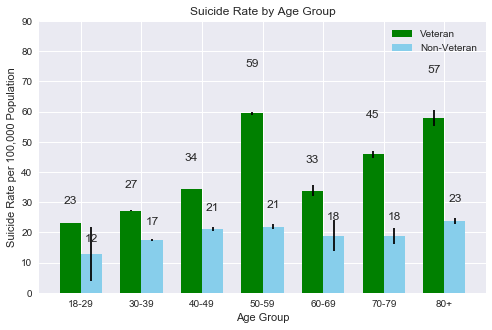

In [22]:
# Plot Bar Chart for final_data2
N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind,vet_rate, width, color='green', yerr=0.2*final_data2['Vet Std error'])


rects2 = ax.bar(ind+width, non_vet_rate, width, color='skyblue', yerr=0.2*final_data2['Non-Vet Std error'])

# Add some text for labels, title and axes ticks
ax.set_ylabel('Suicide Rate per 100,000 Population')
ax.set_xlabel('Age Group')
ax.set_title('Suicide Rate by Age Group')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'))
plt.ylim(0,90,10)
ax.legend((rects1[0], rects2[0]), ('Veteran', 'Non-Veteran'))
sns.set(rc={'figure.figsize':(12,7)})

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.25*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

## Veteran Suicides by Gender

In [23]:
# Read and create dataframe for female vets
female_vets_df = pd.read_csv("veteran_data/Vet Suicides 2005-2014 (Females).csv")
female_vets_df = female_vets_df.set_index("female")
female_vets_df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
female,,,,,,,,,,
18-29,6.7,4.7,10.2,5.4,15.2,11.1,19.3,12.9,15.7,11.0
30-39,13.8,10.9,15.7,15.9,14.9,15.3,13.5,14.4,17.4,17.6
40-49,27.4,7.8,14.8,12.8,16.7,17.4,18.1,20.3,20.6,22.7
50-59,7.5,12.9,13.8,25.3,18.1,18.8,18.1,18.1,11.8,20.0
60-69,4.8,6.8,8.6,4.0,9.0,19.4,14.7,11.9,9.7,14.5
70-79,25.9,5.3,0.0,0.0,10.8,0.0,10.6,31.4,0.0,14.7
80+,15.3,7.8,8.2,17.7,0.0,0.0,5.2,0.0,5.7,0.0


In [24]:
# Read and create dataframe for male vets
male_vets_df = pd.read_csv("veteran_data/Vet Suicides 2005-2014 (Males).csv")
male_vets_df = male_vets_df.set_index("male")
male_vets_df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
male,,,,,,,,,,
18-29,27.8,48.2,37.4,48.4,45.5,55.4,60.4,67.0,74.6,73.3
30-39,44.7,44.3,43.1,40.0,45.1,47.7,54.3,49.2,51.5,55.5
40-49,48.6,40.8,49.1,50.6,46.4,44.8,51.8,46.6,46.3,45.6
50-59,39.3,44.0,41.5,45.9,45.6,45.8,50.2,45.4,39.4,43.6
60-69,31.1,32.9,32.4,38.1,32.4,32.8,31.1,30.0,32.0,33.1
70-79,31.5,34.7,30.9,33.2,34.0,32.7,33.3,36.4,42.0,34.5
80+,41.5,38.0,38.9,41.5,43.0,36.4,44.6,45.7,44.9,46.7


In [27]:
# Calculate averages for female vets
female_avgs = []
for column in female_vets_df:
    avgs = (female_vets_df[column]).mean()
    female_avgs.append(avgs)
# Calculate averages for male vets
male_avgs = []
for column in male_vets_df:
    avgs = (male_vets_df[column]).mean()
    male_avgs.append(avgs)

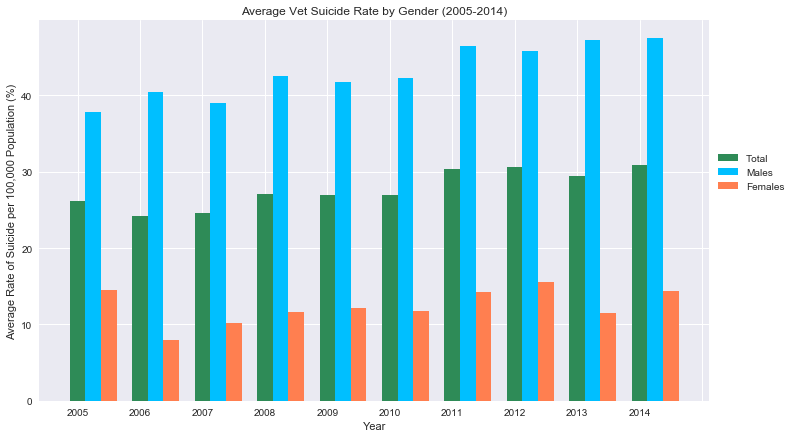

In [33]:
# Combine averages into a list for plotting
avgs_list = [male_avgs, female_avgs]
total_list = [male + female for male, female in zip(male_avgs, female_avgs)]
total_avg_list = [x / 2 for x in total_list]
years_list = ["2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014"]
# Give chart title, labels, and ticks
sns.set_style("darkgrid")
plt.title("Average Vet Suicide Rate by Gender (2005-2014)")
plt.xlabel("Year")
plt.ylabel("Average Rate of Suicide per 100,000 Population (%)")
plt.xticks(np.arange(11), years_list)
# Plotting bar chart
x = np.arange(10)
plt.bar(x + 0.00, total_avg_list, color= 'seagreen', width = 0.25, label="Total")
plt.bar(x + 0.25, avgs_list[0], color = 'deepskyblue', width = 0.25, label="Males")
plt.bar(x + 0.50, avgs_list[1], color = 'coral', width = 0.25, label="Females")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.6))
plt.show()

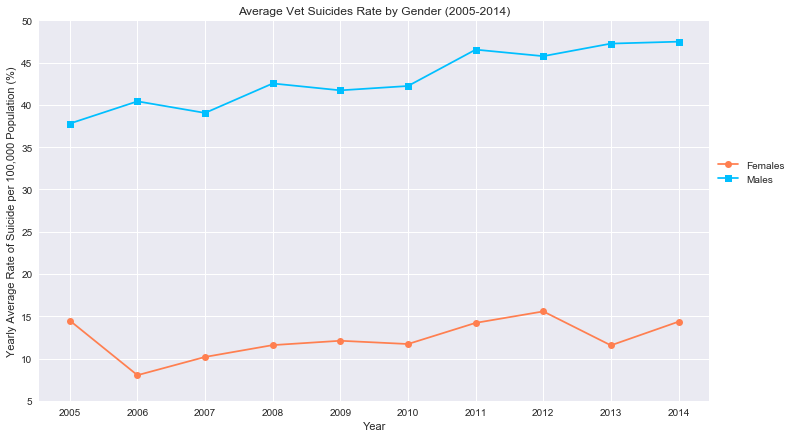

In [34]:
# Give chart titles, labels, and limits
plt.title("Average Vet Suicides Rate by Gender (2005-2014)")
plt.xlabel("Year")
plt.ylabel("Yearly Average Rate of Suicide per 100,000 Population (%)")
#plt.xlim(2005, 2014)
plt.ylim(5, 50)
# Create handles for legend and plot line graph with grid
Female, = plt.plot(years_list, female_avgs, marker="o", color="coral", label="Females")
Male, = plt.plot(years_list, male_avgs, marker="s", color="deepskyblue", label="Males")
plt.legend(handles=[Female, Male], loc='center left', bbox_to_anchor=(1, 0.6))
plt.show()